# Estimacion de la velocidad de rotacion terrestre

## A) Descarguen los datos experimentales de cada canal de observacion.

In [61]:
import os
import wget
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt

data_folder = 'Data'
if not os.path.exists(data_folder):
    os.mkdir(data_folder)

data_file = os.path.join(data_folder, 'DataRotacion.csv')
data_url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'

if not os.path.exists(data_file):
    wget.download(data_url, data_file)
    print('File loaded')

## B) Cargue los datos usando Pandas y haga un filtrado para obtener los datos correspondientes a λ = 30.


In [62]:
data = pd.read_csv(data_file)
angle_filter = data['angle'] == 30
filtered_data = data[angle_filter].copy()
h_values = np.array(filtered_data['h'])
y_values = np.array(filtered_data['y'])
sigmay_values = np.array(filtered_data['sigmay'])

## C) Defina el modelo fisico presentado para la desviacion por efecto coriolis. El modelo debe tener como entrada la altura inicial de caida h, el parametro de ajuste p = ω, la latitud λ y la aceleracion de la gravedad g.

In [63]:
def coriolis_model(h, lamb, p, g=9.81):
    y = 2 * np.sqrt(2) * (1 / 3) * p * np.cos(np.deg2rad(lamb)) * np.sqrt(h**3 / g)
    return y

## D) Defina la funcion χ^2, donde los argumentos son (h, y, sigmay, angle, g)

In [67]:
def funcion(p, h, y, sigmay, g=9.81, angle=30):
    model = coriolis_model(h, angle, p, g)
    residuals = y - model
    chi2 = np.sum(residuals**2 / (2 * sigmay**2))
    return chi2


## E) Minimice usando optimize. Para λ = 30, deberia obtener ω = 7.24 × 10^−5

In [70]:
p0 = np.ones(1)
minimize_options = {'disp': True}
result = spo.minimize(funcion, p0, args=(h_values, y_values, sigmay_values), options=minimize_options)
omega = result.x[0]
print("ω es:", omega)

Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
ω es: 7.243998042010375e-05


## F) Dibuje los datos y el modelo para esa latitud.

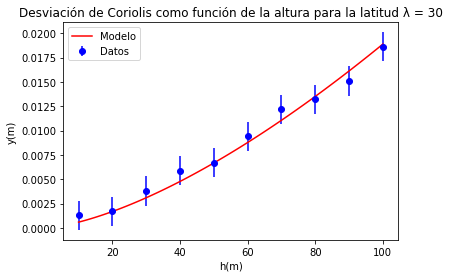

In [71]:
h_model = np.linspace(np.min(h_values), np.max(h_values), 100)
y_model = coriolis_model(h_model, 30, omega)
plt.errorbar(h_values, y_values, yerr=sigmay_values, fmt='o', color='blue', label="Datos")
plt.plot(h_model, y_model, 'r', label="Modelo")
plt.xlabel("h(m)")
plt.ylabel("y(m)")
plt.title("Desviación de Coriolis como función de la altura para la latitud λ = 30")
plt.legend()
plt.show()